In [46]:
#deps
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

### (3.5.11) 
A computer system uses passwords that are exactly six characters and each character is one of the 26 letters (a-–z) or 10 integers (0-–9). Suppose that 10,000 users of the system have unique passwords. A hacker randomly selects (with replacement) 100,000 passwords from the potential set, and a match to a user’s password is called a hit.
- What is the distribution of the number of hits? 
- What is the probability of no hits?
- What are the mean and variance of the number of hits?

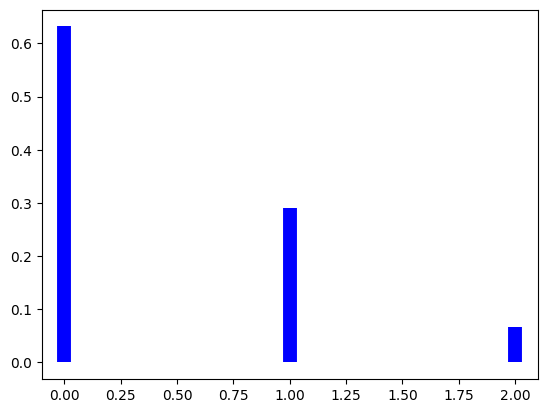

In [47]:
# password length = 6
# char count = 26 + 10 = 36
# passwords count = 10000
# number of possible passwords = 36^6

p = 10000/pow(36,6)
n = 100000

rv = ss.binom(n, p)
x = np.arange(ss.binom.ppf(0.01, n, p),
              ss.binom.ppf(0.99, n, p))
fig, ax = plt.subplots(1, 1)
ax.vlines(x, 0, ss.binom.pmf(x, n, p), colors='b', lw=10)

In [48]:
prob = ss.binom.pmf(0, n, p)
print(prob)

0.6316658688216629


In [49]:
mean, var = ss.binom.stats(n, p, moments='mv')
print(f'Mean: {mean}')
print(f'Variance: {var}')

Mean: 0.45939365799778337
Variance: 0.45939154757245326


### (3.5.13) 
Because all airline passengers do not show up for their reserved seat, an airline sells 125 tickets for a flight that holds only 120 passengers. The probability that a passenger does not show up is 0.10, and the passengers behave independently.
- What is the probability that every passenger who shows up can take the flight? 
- What is the probability that the flight departs with empty seats?


In [50]:
p = 0.1
n = 125 

prob = 1 - ss.binom.cdf(4, n , p)
print(f'Probability of every passanger being able to take a flight: {prob}')

Probability of every passanger being able to take a flight: 0.9961414046432231


In [51]:
p = 0.1
n = 125

prob = 1 - ss.binom.cdf(5, n, p)
print(f'Probability of departing with empty seats: {prob}')

Probability of departing with empty seats: 0.9885678127843244


### (3.6.6) 
A player of a video game is confronted with a series of opponents and has an 80% probability of defeating each one. Success with any opponent is independent of previous encounters. Until defeated, the player continues to contest opponents.
- What is the probability mass function of the number of opponents contested in a game? 
- What is the probability that a player defeats at least two opponents in a game?
- What is the expected number of opponents contested in a game?
- What is the probability that a player contests four or more opponents in a game?
- What is the expected number of game plays until a player contests four or more opponents?

In [52]:
#Geometric distribution

p=0.2
# pmf = (1-p)^(x-1) * p 
# pmf = 0.8^(x-1) * 0.2

In [53]:
prob = 1- ss.geom.cdf(2, p)
print(f'Probability of defeating at least 2 players: {prob}')

Probability of defeating at least 2 players: 0.64


In [57]:
expectedCount = ss.geom.mean(p)
print(f'Expected number of opponents: {expectedCount}')

Expected number of opponents: 5.0


In [63]:
prob = 1 - ss.geom.cdf(3, p)
print(f'Probability of contesting four or more opponents: {prob}')

Probability of contesting four or more opponents: 0.512


In [66]:
e = ss.geom.mean(prob)
print(f'Expected number of plays until four or more: {e}')

Expected number of plays until four or more: 1.953125


### (3.8.5) 
Astronomers treat the number of stars in a given volume of space as a Poisson random variable. The density in the Milky Way Galaxy in the vicinity of our solar system is one star per 16 cubic light- years.
- What is the probability of two or more stars in 16 cubic light-years?
- How many cubic light-years of space must be studied so that the probability of one or more stars exceeds 0.95?

In [71]:
mu = 1

prob = 1 - ss.poisson.cdf(1, mu)
print(f'Probability of two or more stars: {prob}')

Probability of two or more stars: 0.26424111765711533


In [ ]:
#MATHS TODO


### (3.S16) 
A congested computer network has a 1% chance of losing a data packet that must be resent, and packet losses are independent events. An e-mail message requires 100 packets.

- What is the distribution of the number of packets in an e-mail message that must be resent? Include the parameter values.
- What is the probability that at least one packet is resent?
- What is the probability that two or more packets are resent?
- What are the mean and standard deviation of the number of packets that are resent?
- If there are 10 messages and each contains 100 packets, what is the probability that at least one message requires that two or more packets be resent?

In [96]:
# Binomial
n = 100
p = 0.01

In [97]:
prob = 1 - ss.binom.pmf(0, n, p)
print(f'Probability of at least one packet being resent: {prob}')

Probability of at least one packet being resent: 0.6339676587267704


In [98]:
prob = 1 - ss.binom.cdf(1, n, p)
print(f'Probability of two or more being resent: {prob}')

Probability of two or more being resent: 0.26423802107704375


In [99]:
mean = ss.binom.mean(n, p)
std = ss.binom.std(n, p)

print(f'Mean: {mean}')
print(f'Standard deviation: {std}')

Mean: 1.0
Standard deviation: 0.99498743710662


In [100]:
prob2 = 1 - ss.binom.pmf(0, 10, prob)

print(f'Probability: {prob2}')

Probability: 0.9535085152866581



### (3.S28) 
A manufacturer of a consumer electronics product expects 2% of units to fail during the warranty period. A sample of 500 independent units is tracked for warranty performance.
- What is the probability that none fails during the warranty period? 
- What is the expected number of failures during the warranty period?
- What is the probability that more than two units fail during the warranty period?

In [101]:
n = 500
p = 0.02
prob = ss.binom.pmf(0, n, p)
print(f'Probability of none fails: {prob} ~ 0')

Probability of none fails: 4.102398514547255e-05 ~ 0


In [102]:
ss.binom.mean(n, p)

10.0

In [104]:
prob = 1 - ss.binom.cdf(2, n, p)
print(f'Probability of more than 2 units failing: {prob}')

Probability of more than 2 units failing: 0.9974088594871737


The probability that a patient recovers from a rare blood disease is 0.4. If 15 people are known to have contracted this disease, what is the probability that
- at least 10 survive 
- from 3 to 8 survive
- exactly 5 survive
- Find the mean and variance.

In [124]:
n = 15
p = 0.4

prob = 1 - ss.binom.cdf(9, n, p)
print(f'Probability: {prob}')

Probability: 0.033833302884352046


In [126]:
prob = ss.binom.cdf(8, n, p) - ss.binom.cdf(2, n, p)
print(f'Probability: {prob}')

Probability: 0.877838591066112


In [127]:
prob = ss.binom.pmf(5, n, p)
print(f'Probability: {prob}')

Probability: 0.18593784476467193


In [128]:
mean, var = ss.binom.stats(n, p, moments='mv')
print(f'Mean: {mean}, Variance: {var}')

Mean: 6.0, Variance: 3.5999999999999996



A large chain retailer purchases a certain kind of electronic device from a manufacturer. The manufac- turer indicates that the defective rate of the device is 3%
- The inspector of the retailer randomly picks 20 items from a shipment. What is the probability that there will be at least one defective item among them?
- Suppose that the retailer receives 10 shipments in a month and the inspector randomly tests 20 devices per shipment. What is the probability that there will be 3 shipments containing at least one defective device?

In [129]:
p = 0.03
n = 20

prob = 1 - ss.binom.pmf(0, n, p)
print(f'Probability: {prob}')

Probability: 0.4562056570732528


In [130]:
n = 10
p = prob

prob = ss.binom.pmf(3, n, p)
print(f'Probability: {prob}')

Probability: 0.1602160581178045


High flows result in the closure of a causeway. From past records, the road is closed for this reason on 10 days during a 20-year period. At an adjoining village, there is concern about the closure of the causeway because it provides the only access. The villagers assume that the probability of a closure of the road for more than one day during a year is less than 0.10. Is this correct? Please show using the Poisson distribution.

In [139]:
l = 10/20 

prob = 1 - ss.poisson.cdf(1, l)
print(f'Probability: {prob}')

Probability: 0.09020401043104986


A company performs inspection on shipments from suppliers in order to detect nonconforming products. Assume a lot contains 1000 items and 1% is nonconforming. Assuming that the number of nonconforming products in the sample is binomial, what sample size is needed so that the probability of choosing at least one nonconforming item in the sample is at least 0.9?


In [ ]:
#TODO MATHS

The number of errors in a textbook follows a Poisson distribution with a mean of 0.01 error per page. What is the probability that there are three or less errors in 100 pages?

In [143]:
l=0.01*100

prob = ss.poisson.cdf(3, l)
print(f'Probability: {prob}')

Probability: 0.9810118431238462
